# Importamos librerias a utilizar

In [55]:
import tensorflow as tf
import numpy as np
from PIL import Image
import cv2 as cv
import random
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

# Importar Dataset

NumPy :  Python programming language library that provides support for large arrays and matrices.
    
NPY file : is a NumPy array file created by the Python software package with the NumPy library installed. It contains an array saved in the NumPy (NPY) file format. NPY files store all the information required to reconstruct an array on any computer, which includes dtype and shape information.


In [56]:
data = np.load('data_16_02.npy')

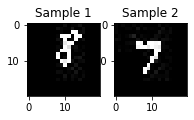

In [57]:
#Veamos como luce la data dentro del dataset 

data_without_label_1=data[:,0:400][random.randrange(0,10000)]
data_without_label_2=data[:,0:400][random.randrange(0,10000)]

resized_image_1 =np.resize(data_without_label_1,(20,20))
resized_image_2 =np.resize(data_without_label_2,(20,20))

img = Image.fromarray(resized_image_1).convert('L')
img.save('rand1.jpeg')
img = Image.fromarray(resized_image_2).convert('L')
img.save('rand2.jpeg')


img_1 = cv.imread('rand1.jpeg')
img_2 = cv.imread('rand2.jpeg')


plt.subplot(141)
plt.title("Sample 1")
plt.imshow(img_1)
plt.subplot(142)
plt.title("Sample 2")
plt.imshow(img_2)

plt.show()

Procesar Dataset 


In [58]:
dataframe=pd.DataFrame(data)
df_shufled = shuffle(dataframe)

In [59]:
df_training = df_shufled [0 : 11000]
df_testing = df_shufled [11000 : 11600 ]

In [60]:
df_training_features =  df_training.iloc[:,0:400].values 
df_training_labels   =  df_training.iloc[:,400:401].values 

df_testing_features  =  df_testing.iloc[:,0:400].values 
df_testing_labels   =  df_testing.iloc[:,400:401].values 

# Crear modelo neuronal

In [61]:
x_train = tf.keras.utils.normalize(df_training_features, axis=1) # Normalize the training dataset
x_test = tf.keras.utils.normalize(df_testing_features, axis=1) # Normalize the testing dataset

In [62]:
x_train

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.01154597, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00162721,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.00363324, ..., 0.        , 0.        ,
        0.        ]])

In [63]:
#Build the model object
model = tf.keras.models.Sequential()
# Add the Flatten Layer
model.add(tf.keras.layers.Flatten())
# Build the input and the hidden layers
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu,input_shape=(400,)))

model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax,input_shape=(128,)))
# Build the output layer
#model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))
          
          
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
          

In [64]:

model.fit(x=x_train, y=df_training_labels, epochs=50) # Start training process

# Evaluate the model performance
test_loss, test_acc = model.evaluate(x=x_test, y=df_testing_labels)
# Print out the model accuracy 
print('\nTest accuracy:', test_acc)

Train on 11000 samples
Epoch 1/50
11000/11000 [==============================] - 1s 85us/sample - loss: 2.0497 - accuracy: 0.3354
Epoch 2/50
11000/11000 [==============================] - 1s 65us/sample - loss: 1.6422 - accuracy: 0.5022
Epoch 3/50
11000/11000 [==============================] - 1s 73us/sample - loss: 1.3867 - accuracy: 0.5926
Epoch 4/50
11000/11000 [==============================] - 1s 76us/sample - loss: 1.1987 - accuracy: 0.6620
Epoch 5/50
11000/11000 [==============================] - 1s 79us/sample - loss: 1.0550 - accuracy: 0.7106
Epoch 6/50
11000/11000 [==============================] - 1s 74us/sample - loss: 0.9424 - accuracy: 0.7485
Epoch 7/50
11000/11000 [==============================] - 1s 79us/sample - loss: 0.8529 - accuracy: 0.7785
Epoch 8/50
11000/11000 [==============================] - 1s 78us/sample - loss: 0.7775 - accuracy: 0.7990
Epoch 9/50
11000/11000 [==============================] - 1s 71us/sample - loss: 0.7155 - accuracy: 0.8205
Epoch 10/50
11

In [93]:
predictions = model.predict([x_test]) # Make prediction

# Analizamos casos de éxito

Valor a predecir:
[2]
Predicción:
2


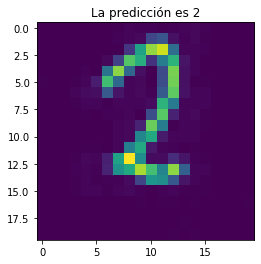

In [94]:
list_goods = []
for j in range(0,600):
    if (df_testing_labels[j] == np.argmax(predictions[j])) :
        list_goods.append(j)

value = list_goods[random.randrange(0,len(list_goods))]

print("Valor a predecir:")
print(df_testing_labels[value])
print("Predicción:")
print(np.argmax(predictions[value])) # Print out the number

resized_result =np.resize(df_testing_features[value],(20,20))  #229 

img = Image.fromarray(resized_result).convert('L')

plt.title("La predicción es "+str(np.argmax(predictions[value])))
plt.imshow(img)

plt.show()

# Analizamos casos de error

In [141]:
value = list_error[random.randrange(0,len(list_error))]

print("Valor a predecir:")
print(df_testing_labels[value])
print("Predicción:")
print(np.argmax(predictions[value])) # Print out the number

Valor a predecir:
[9]
Predicción:
0


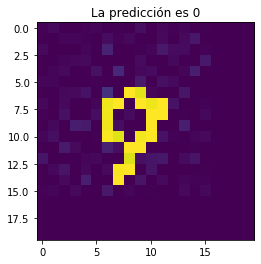

In [142]:
resized_result =np.resize(df_testing_features[value],(20,20))  #229 

img = Image.fromarray(resized_result).convert('L')

plt.title("La predicción es "+str(np.argmax(predictions[value])))
plt.imshow(img)

plt.show()